In [6]:
import os
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from data_collection import *
import numpy as npl
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ensemble import * 
from sklearn.manifold import TSNE

In [134]:
##run PCA's on each variable
def make_PCA(data,n):
    pca = PCA(n_components=n)
    pca.fit(data)
    X_pca = pca.transform(data)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    return X_pca


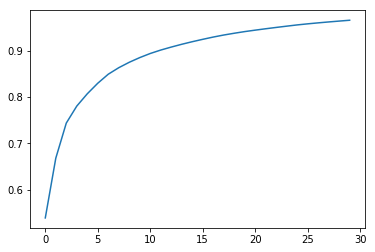

In [8]:
X1_pca = make_PCA(x1,30)
#.9 var at 10

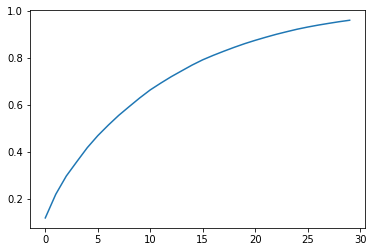

In [9]:
X4_pca = make_PCA(x4,30)
##.9 at 25

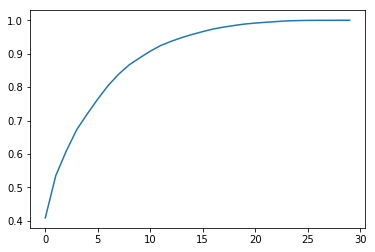

In [10]:
X5_pca = make_PCA(x5,30)
## .9 at 8

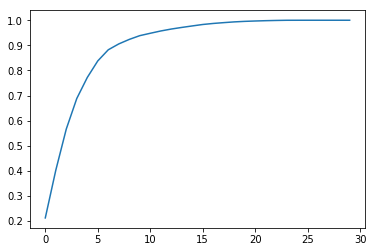

In [11]:
X6_pca = make_PCA(x6,30)
#.9 at 6

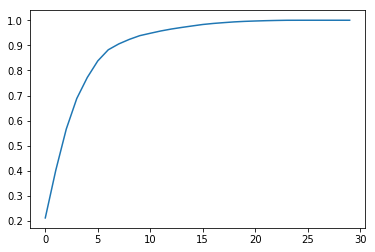

In [12]:
X7_pca = make_PCA(x7,30)
# .9 at 7

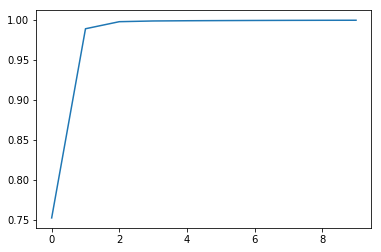

In [13]:
M_pca = make_PCA(master,10)
# ~1 at 2

In [255]:
#put output k into buckets for coloring

# b = lambda x: -1 if x<2 else (0 if x<5 else (1 if x<10 else 2))
b = lambda x: -4 if x<1.4 else(-3 if x<2 else (-1 if x<4 else (0 if x<6 else (1 if x<10 else 2))))
buckets = np.array([b(xi) for xi in y])


h = y.max()
l = y.min()
y_norm = y.copy()
for p in range(y.shape[0]):
    x = y[p]
    y_norm[p] = 2*(x-l)/(h-l)-1      


In [256]:
def norm(data):
    new = data.copy()
    for i in range(data.shape[1]):
        var = data[:,i]
        h = var.max()
        l = var.min()
        new_var = new[:,i]
        for p in range(var.shape[0]):
            x = var[p]
            new_var[p] = (x-l)/(h-l)
        new[:,i]= new_var
    return new
            


In [257]:
##Plot PCA in 2-d/ 3-d
##col variable is the k output and is used for coloring the dots.
def plot(data,col):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ##adds three dimensional plot
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=col, marker='o',cmap="rainbow")
    plt.show()
    plt.scatter(data[:, 0], data[:, 1], edgecolor='none', alpha= 1 , c=col,cmap="rainbow")
    
    plt.colorbar()

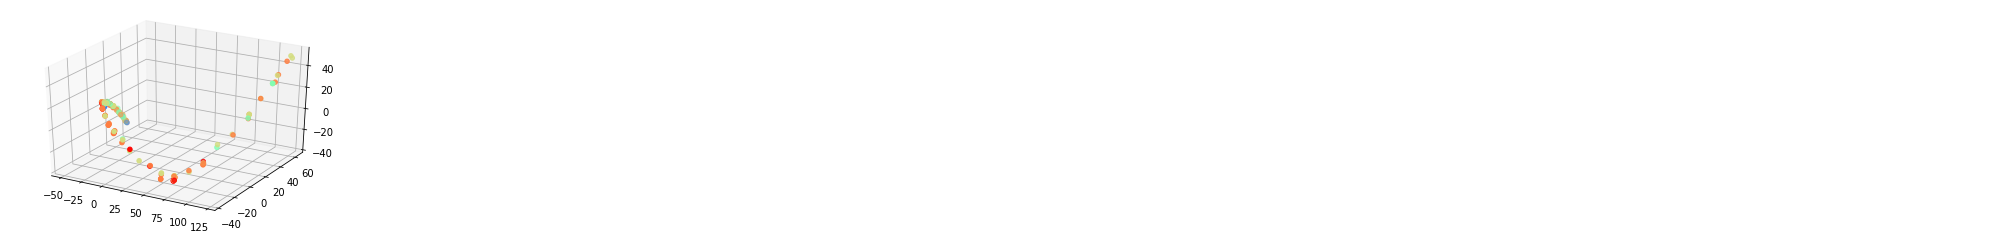

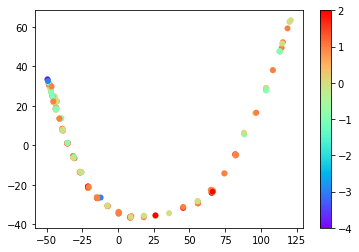

In [258]:
##Good indicator of where we might find outliers. Heavy on the tails, especially the negative x axis
plot(X1_pca,buckets)
X1_norm= norm(X1_pca)

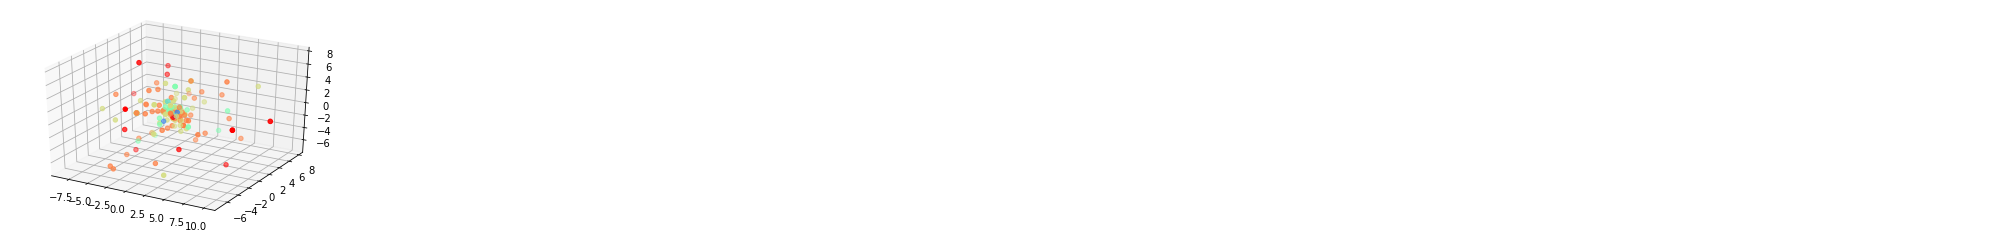

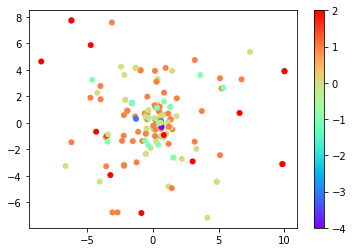

In [259]:
## the best binding ratios are the outliers of this plot- most of the rest are cluttered in the middle
plot(X4_pca, buckets)
X4_norm = norm(X4_pca)

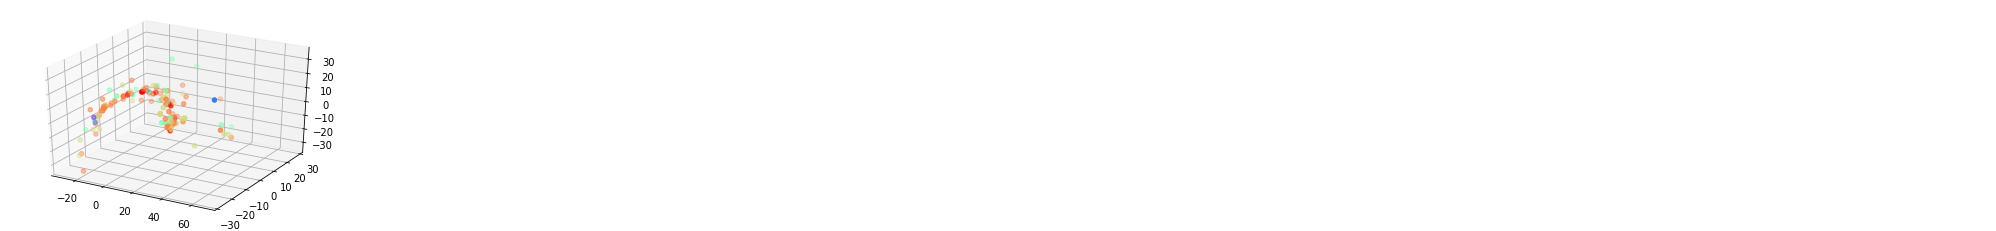

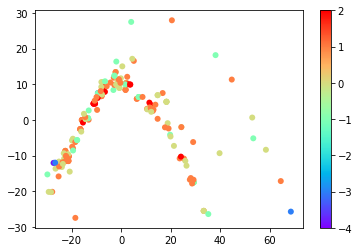

In [265]:
##Like in X1, our poorly binding points are found at the heads and tails of the 2-d Projection, while the high outliers are clustered in the middle
##but the difference is less pronounced, as some of the lower tier of binding are in that same cluster
plot(X5_pca, buckets)
X5_norm = norm(X5_pca)

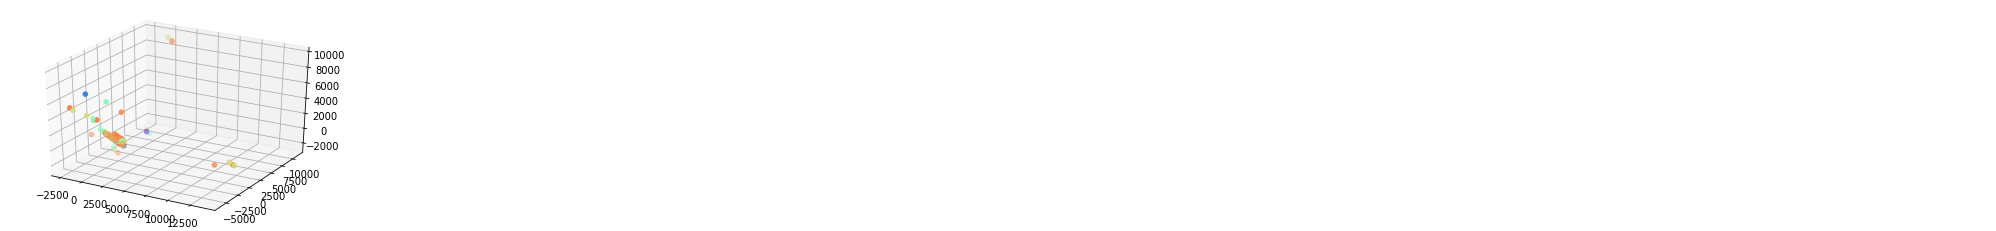

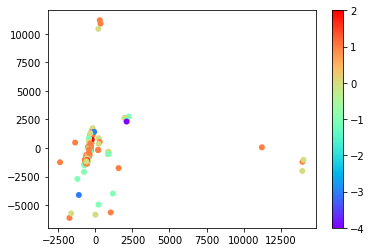

In [267]:
##the scale of these are pretty incredible. It seems again like the higher binders are tightly clustered, but that may jut be a problem of 
##scaling. Either way, Our big outliers are quite distinct from to mass
plot(X6_pca, buckets)
X6_norm = norm(X6_pca)

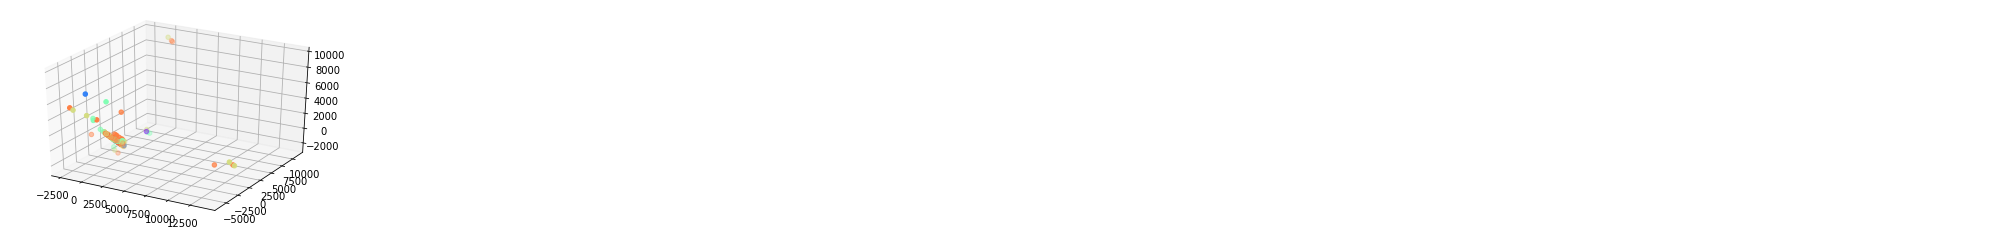

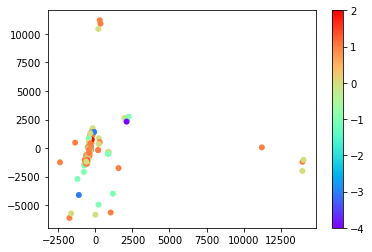

In [270]:
# ditto x7 - suspicious
plot(X7_pca, buckets)
X7_norm = norm(X7_pca)


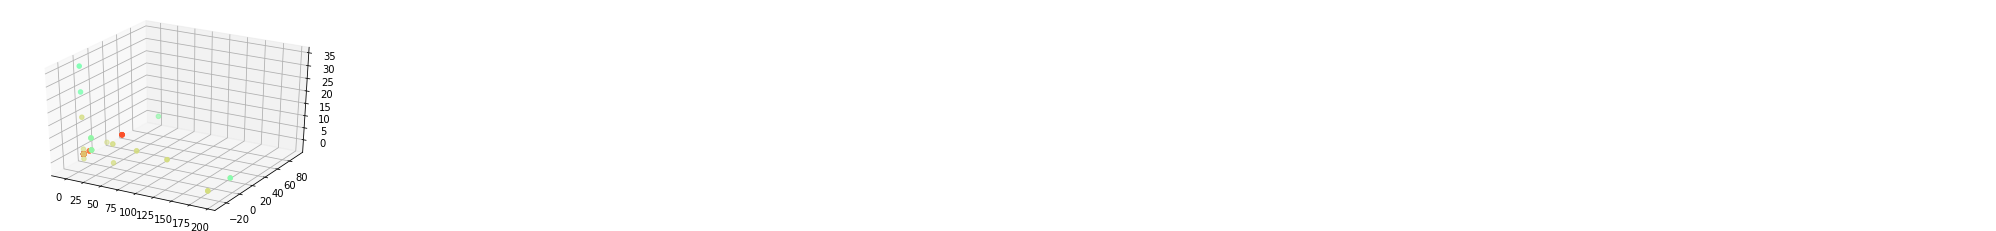

(191,)


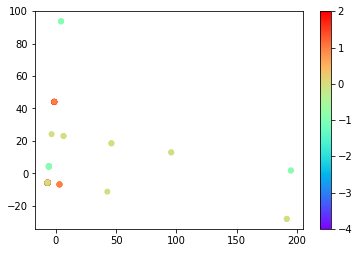

In [273]:
##I'm unclear what to make of this
plot(M_pca,buckets)
M_norm = norm(M_pca)

In [343]:
##creates fit and plots the TSNE in 2 dimensions (3 dimension option is commented out)
def runTSNE(data, col , dims, perp, i):
    tsne = TSNE(perplexity=perp, n_iter=i)
#     tsne = TSNE(perplexity=perp, n_iter=i, n_components=3)
    tsne_results = tsne.fit_transform(data[:,:dims])
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     ax.scatter(tsne_results[:, 0], tsne_results[:, 1], tsne_results[:, 2], c=col, marker='o',cmap="rainbow")
#     plt.show()
    
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], edgecolor='none', alpha= .8 , c=col,cmap="RdYlBu_r")
    plt.colorbar()
    return tsne_results

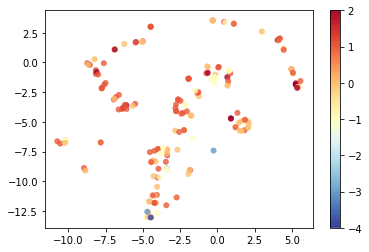

In [354]:
# Clear bunching of outliers on ends in
# .9 at 10, 20 is safe
# TSNE1 = runTSNE(data=X1_norm,col=buckets, dims=15,perp=5,i=1000)
# TSNE1 = runTSNE(data=X1_norm,col=buckets, dims=15,perp=30,i=1000)
TSNE1 = runTSNE(data=X1_norm,col=buckets, dims=15,perp=50,i=1000)

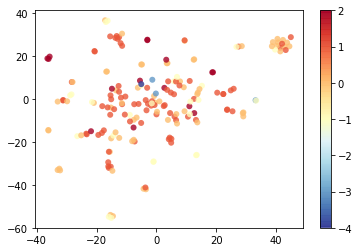

In [358]:
##Possible differentiation by the z axis
## .9 found after 20, use all dimensions
## low cluster in the middle
TSNE4 = runTSNE(X4_norm,buckets, 20,5,1000)
# TSNE4 = runTSNE(X4_norm,buckets, 20,30,1000)
# TSNE4 = runTSNE(X4_norm,buckets, 20,50,1000)

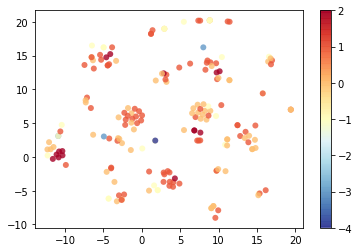

In [373]:
## .9 found before 10, no need for more than 15
# TSNE5 = runTSNE(X5_norm,buckets, 15,5,1000)
TSNE5 = runTSNE(X5_norm,buckets, 25,25,2000)
# TSNE5 = runTSNE(X5_norm,buckets, 25,50,2000)

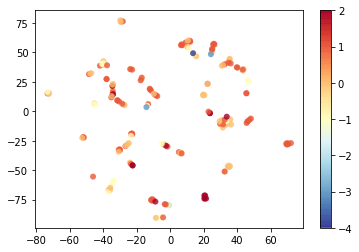

In [372]:
TSNE6 = runTSNE(X6_norm,buckets, 10,3,2000)
# TSNE6 = runTSNE(X6_norm,buckets, 10,10,2000)
# TSNE6 = runTSNE(X6_norm,buckets, 10,20,2000)

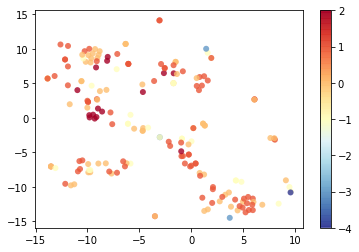

In [370]:
# TSNE7 = runTSNE(X7_norm,buckets, 10,5,2000)
TSNE7 = runTSNE(X7_norm,buckets, 10,25,2000)
# TSNE7 = runTSNE(X7_norm,buckets, 10,50,2000)

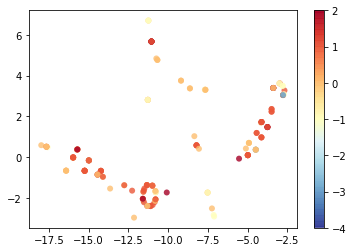

In [367]:
# TSNEM = runTSNE(M_norm,buckets, 3,4,5000)
# TSNEM = runTSNE(M_norm,buckets, 3,20,5000)
TSNEM = runTSNE(M_norm,buckets, 3,50,5000)

In [361]:
##Concatinates to arrays together 
def combine (data_list):
    c=data_list[0]
    for d in range(len(data_list)):
        if d>0:
            c=np.concatenate([c,data_list[d]],axis=1)
    dims = len(c[0,:])
    return c

In [322]:
##Pick the number of Principle componenets to take from each variable
d=10
combos = []
x1x4 = combine([X1_norm[:,:d],X4_norm[:,:d]])
x1x5=combine([X1_norm[:,:d],X5_norm[:,:d]])
x1x6=combine([X1_norm[:,:d],X6_norm[:,:d]])
x1x7=combine([X1_norm[:,:d],X7_norm[:,:d]])
x1M=combine([X1_norm[:,:d],M_norm[:,:d]])
x4x5=combine([X4_norm[:,:d],X5_norm[:,:d]])
x4x6=combine([X4_norm[:,:d],X6_norm[:,:d]])
x4x7=combine([X4_norm[:,:d],X7_norm[:,:d]])
x4M=combine([X4_norm[:,:d],M_norm[:,:d]])
x5x6=combine([X5_norm[:,:d],X6_norm[:,:d]])
x5x7=combine([X5_norm[:,:d],X7_norm[:,:d]])
x5M=combine([X5_norm[:,:d],M_norm[:,:d]])
x6x7=combine([X6_norm[:,:d],X7_norm[:,:d]])
x6M=combine([X6_norm[:,:d],M_norm[:,:d]])
x7M=combine([X7_norm[:,:d],M_norm[:,:d]])
combos.append(x1x4)
combos.append(x1x5)
combos.append(x1x6)
combos.append(x1x7)
combos.append(x1M)
combos.append(x4x5)
combos.append(x4x6)
combos.append(x4x7)
combos.append(x4M)
combos.append(x5x6)
combos.append(x5x7)
combos.append(x5M)
combos.append(x6x7)
combos.append(x6M)
combos.append(x7M)


In [219]:
##pick 3
x1x4x5=np.concatenate([x1x4,X4_norm],1)
x1x4x6=np.concatenate([x1x4,X6_norm],1)
x1x4x7=np.concatenate([x1x4,X7_norm],1)
x1x4M=np.concatenate([x1x4,M_norm],1)
x1x5x6=np.concatenate([x1x5,X6_norm],1)
x1x5x7=np.concatenate([x1x5,X7_norm],1)
x1x5M=np.concatenate([x1x5,M_norm],1)
x1x6x7=np.concatenate([x1x6,X7_norm],1)
x1x6M=np.concatenate([x1x6,M_norm],1)
x1x7M=np.concatenate([x1x7,M_norm],1)
x4x5x6=np.concatenate([x4x5,X6_norm],1)
x4x5x7=np.concatenate([x4x5,X7_norm],1)
x4x5M=np.concatenate([x4x5,M_norm],1)
x4x6x7=np.concatenate([x4x6,X7_norm],1)
x4x7M=np.concatenate([x4x6,X7_norm],1)
x5x6x7=np.concatenate([x5x6,X7_norm],1)
x5x6M=np.concatenate([x5x6,M_norm],1)
x5x7M=np.concatenate([x5x6,M_norm],1)
x6x7M=np.concatenate([x6x7,M_norm],1)


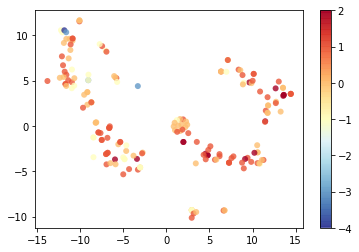

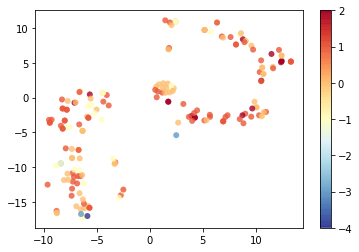

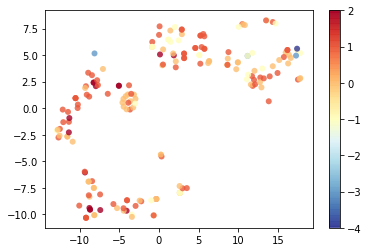

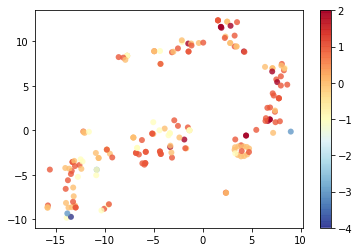

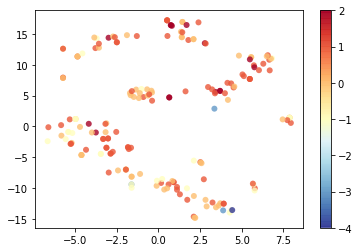

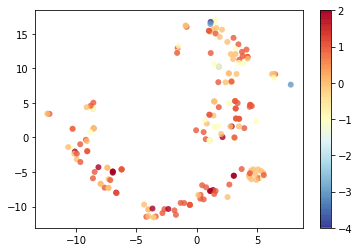

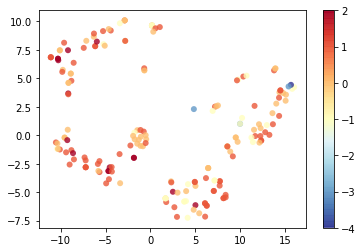

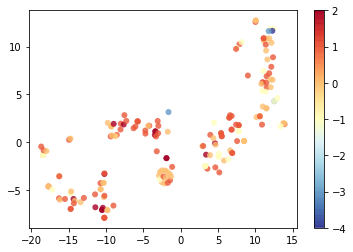

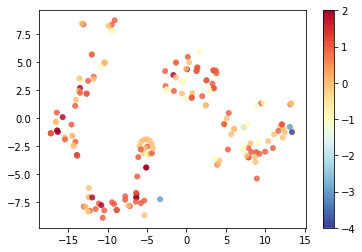

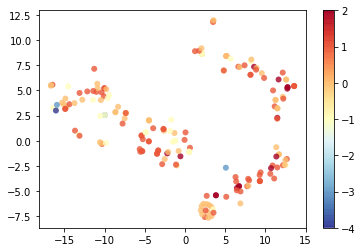

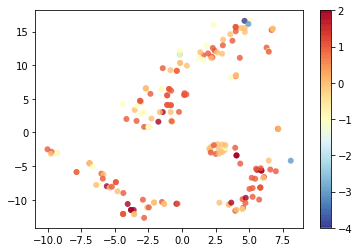

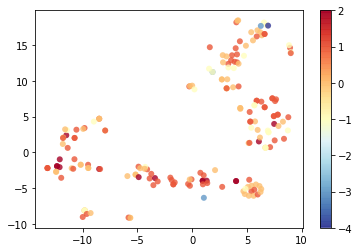

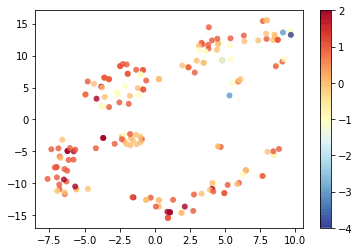

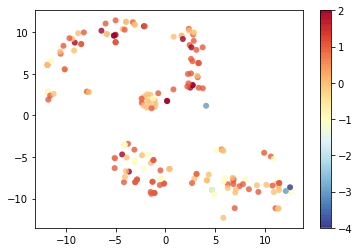

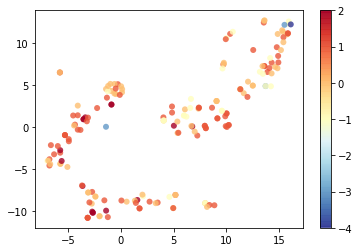

In [374]:
for com in combos:
    plt.clf()
    runTSNE(comb,buckets,15,30,1000)
    plt.show()

0.9671302894258194


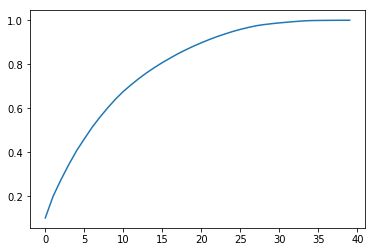

In [149]:
dims = len(comb[0,:])
pca = PCA(n_components=dims)
pca.fit(comb)
print(np.cumsum(pca.explained_variance_ratio_)[int(dims*.66)])
comb_pca = make_PCA(comb,dims)
# np.cumsum(comb_pca.explained_variance_ratio_)[30]

In [112]:
y.shape

(191,)